In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load MELD dataset
meld_train_path = r'datasets\raw\MELD\train\train_sent_emo.csv'
meld_dev_path = r'datasets\raw\MELD\dev_sent_emo.csv'
meld_test_path = r'datasets\raw\MELD\test_sent_emo.csv'

# Load the data
meld_train = pd.read_csv(meld_train_path)
meld_dev = pd.read_csv(meld_dev_path)
meld_test = pd.read_csv(meld_test_path)

# Combine all data for EDA
meld_data = pd.concat([meld_train, meld_dev, meld_test], ignore_index=True)

# Overview of the dataset
print("Dataset Overview:")
print(meld_data.info())
print("\nSample Data:")
print(meld_data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13708 entries, 0 to 13707
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        13708 non-null  int64 
 1   Utterance     13708 non-null  object
 2   Speaker       13708 non-null  object
 3   Emotion       13708 non-null  object
 4   Sentiment     13708 non-null  object
 5   Dialogue_ID   13708 non-null  int64 
 6   Utterance_ID  13708 non-null  int64 
 7   Season        13708 non-null  int64 
 8   Episode       13708 non-null  int64 
 9   StartTime     13708 non-null  object
 10  EndTime       13708 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.2+ MB
None

Sample Data:
   Sr No.  \
0       1   
1       2   
2       3   
3       4   
4       5   

                                                                              Utterance  \
0  also I was the point person on my companys transition from the KL-5 to GR-6 system. 

In [24]:
# Check for missing values
missing_values = meld_data.isnull().sum()
print("\nMissing Values in MELD Dataset:")
print(missing_values)

# Drop rows with missing utterances
meld_data = meld_data.dropna(subset=['Utterance'])
print("\nAfter dropping rows with missing utterances:")
print(meld_data.info())


Missing Values in MELD Dataset:
Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64

After dropping rows with missing utterances:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13708 entries, 0 to 13707
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        13708 non-null  int64 
 1   Utterance     13708 non-null  object
 2   Speaker       13708 non-null  object
 3   Emotion       13708 non-null  object
 4   Sentiment     13708 non-null  object
 5   Dialogue_ID   13708 non-null  int64 
 6   Utterance_ID  13708 non-null  int64 
 7   Season        13708 non-null  int64 
 8   Episode       13708 non-null  int64 
 9   StartTime     13708 non-null  object
 10  EndTime       13708 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.2+ MB
None


C:\Users\rajt8\AppData\Local\Temp\ipykernel_26268\2284635572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=meld_data, order=meld_data['Emotion'].value_counts().index, palette='muted')


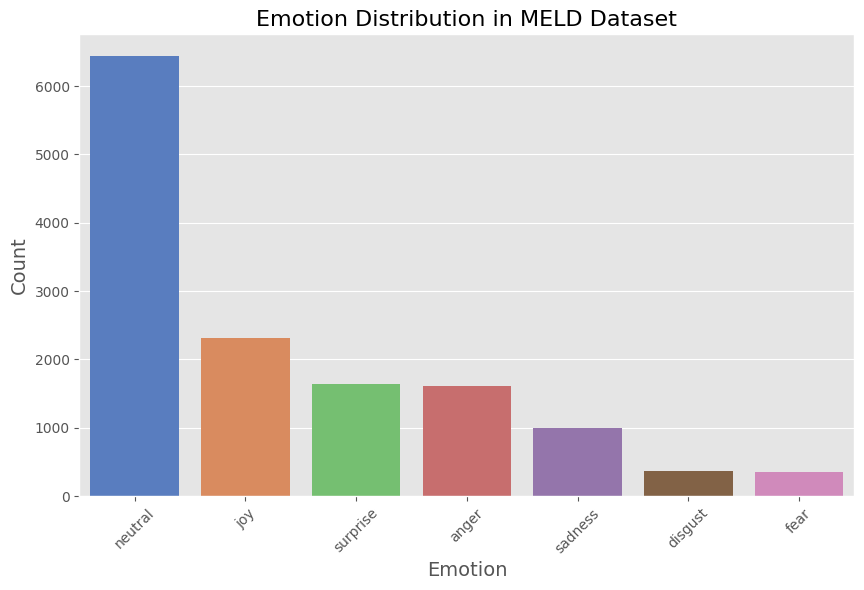

In [25]:
# Visualize emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=meld_data, order=meld_data['Emotion'].value_counts().index, palette='muted')
plt.title('Emotion Distribution in MELD Dataset', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


Utterance Length Statistics (Words):
count    13708.000000
mean         8.005034
std          6.241221
min          1.000000
25%          3.000000
50%          6.000000
75%         11.000000
max         69.000000
Name: word_count, dtype: float64


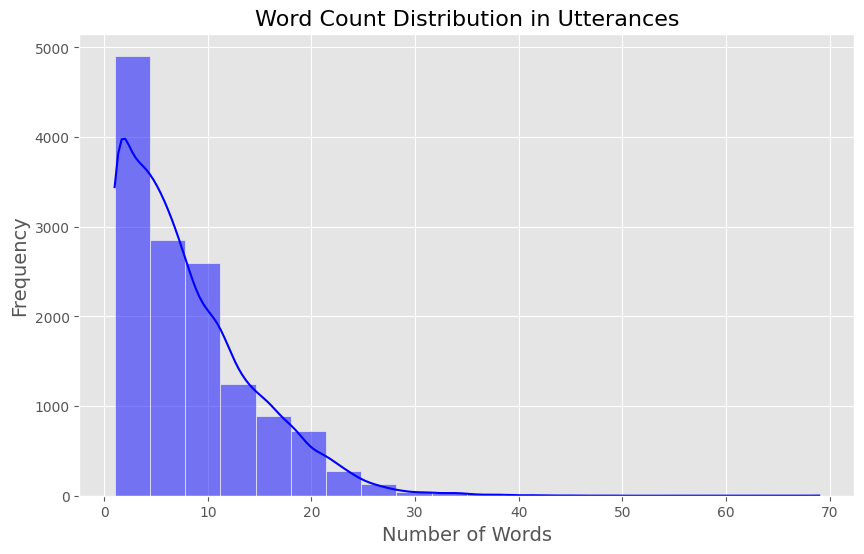

In [27]:
# Add word and character counts
meld_data['word_count'] = meld_data['Utterance'].apply(lambda x: len(str(x).split()))
meld_data['char_count'] = meld_data['Utterance'].apply(len)

# Summary statistics
print("\nUtterance Length Statistics (Words):")
print(meld_data['word_count'].describe())

# Plot word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(meld_data['word_count'], bins=20, kde=True, color="blue")
plt.title("Word Count Distribution in Utterances", fontsize=16)
plt.xlabel("Number of Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [28]:
from collections import Counter
from nltk.corpus import stopwords
import string

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Function to get top words for each emotion
def get_top_words(emotion, group, top_n=10):
    all_words = ' '.join(group['Utterance']).lower().split()
    filtered_words = [word for word in all_words if word not in stop_words and word not in punctuation]
    return Counter(filtered_words).most_common(top_n)

# Get top words for each emotion
for emotion, group in meld_data.groupby('Emotion'):
    print(f"\nTop words for '{emotion}':")
    print(get_top_words(emotion, group))



Top words for 'anger':
[('get', 92), ('don\x92t', 89), ('i\x92m', 89), ('gonna', 66), ("i'm", 62), ('like', 59), ('oh', 57), ('it\x92s', 54), ('no!', 54), ('come', 53)]

Top words for 'disgust':
[('oh', 30), ('like', 21), ('oh,', 20), ("i'm", 18), ('gonna', 17), ('don\x92t', 17), ('that\x92s', 15), ('it\x92s', 15), ('no,', 14), ('no!', 14)]

Top words for 'fear':
[('i\x92m', 36), ('oh', 30), ('gonna', 29), ('don\x92t', 28), ('get', 20), ('it\x92s', 18), ('can\x92t', 17), ('okay,', 16), ('want', 16), ('tell', 15)]

Top words for 'joy':
[('oh', 147), ('oh,', 129), ('i\x92m', 110), ('hey!', 99), ('like', 91), ('it\x92s', 88), ('get', 87), ('that\x92s', 82), ('really', 82), ('thank', 80)]

Top words for 'neutral':
[('yeah,', 312), ('okay,', 282), ('well,', 277), ('i\x92m', 275), ('oh,', 232), ('don\x92t', 220), ('it\x92s', 217), ('get', 210), ('uh,', 207), ('gonna', 202)]

Top words for 'sadness':
[('i\x92m', 121), ('gonna', 68), ('don\x92t', 61), ('oh,', 60), ('oh', 58), ('sorry.', 55), 

C:\Users\rajt8\AppData\Local\Temp\ipykernel_26268\1809705925.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='sentiment_polarity', data=meld_data, palette='muted')


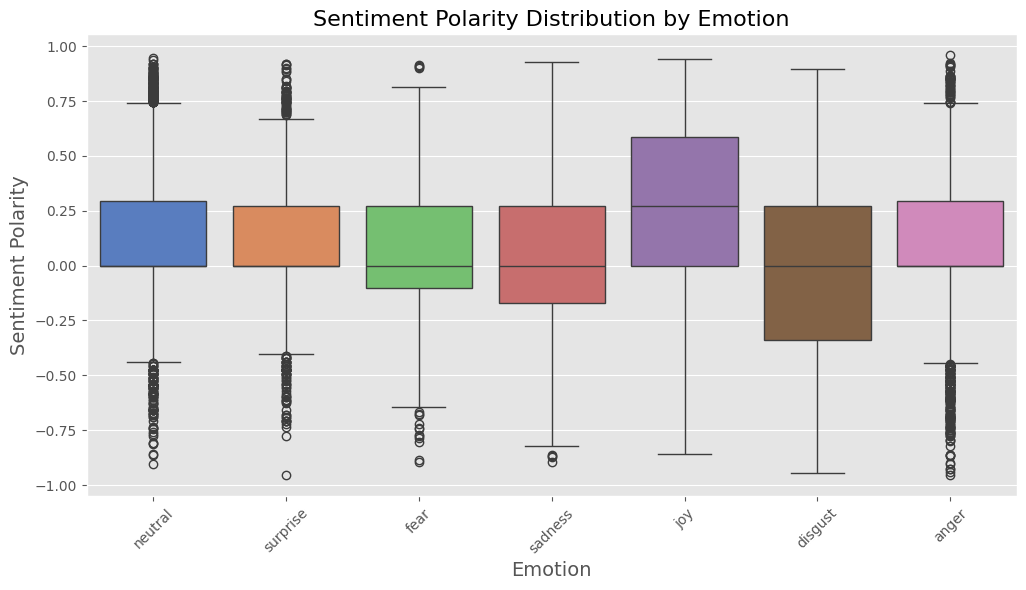

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Add sentiment polarity
meld_data['sentiment_polarity'] = meld_data['Utterance'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Plot sentiment polarity distribution by emotion
plt.figure(figsize=(12, 6))
sns.boxplot(x='Emotion', y='sentiment_polarity', data=meld_data, palette='muted')
plt.title('Sentiment Polarity Distribution by Emotion', fontsize=16)
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Sentiment Polarity', fontsize=14)
plt.xticks(rotation=45)
plt.show()

C:\Users\rajt8\AppData\Local\Temp\ipykernel_26268\2573662160.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)


Error processing datasets\raw\MELD\train\train_splits\dia57_utt0.mp4: [Errno 2] No such file or directory: 'datasets\\raw\\MELD\\train\\train_splits\\dia57_utt0.mp4'
Error processing datasets\raw\MELD\train\train_splits\dia57_utt0.mp4: [Errno 2] No such file or directory: 'datasets\\raw\\MELD\\train\\train_splits\\dia57_utt0.mp4'
Error processing datasets\raw\MELD\train\train_splits\dia57_utt0.mp4: [Errno 2] No such file or directory: 'datasets\\raw\\MELD\\train\\train_splits\\dia57_utt0.mp4'
Error processing datasets\raw\MELD\train\train_splits\dia66_utt0.mp4: [Errno 2] No such file or directory: 'datasets\\raw\\MELD\\train\\train_splits\\dia66_utt0.mp4'
Error processing datasets\raw\MELD\train\train_splits\dia66_utt0.mp4: [Errno 2] No such file or directory: 'datasets\\raw\\MELD\\train\\train_splits\\dia66_utt0.mp4'
Error processing datasets\raw\MELD\train\train_splits\dia66_utt0.mp4: [Errno 2] No such file or directory: 'datasets\\raw\\MELD\\train\\train_splits\\dia66_utt0.mp4'
Erro

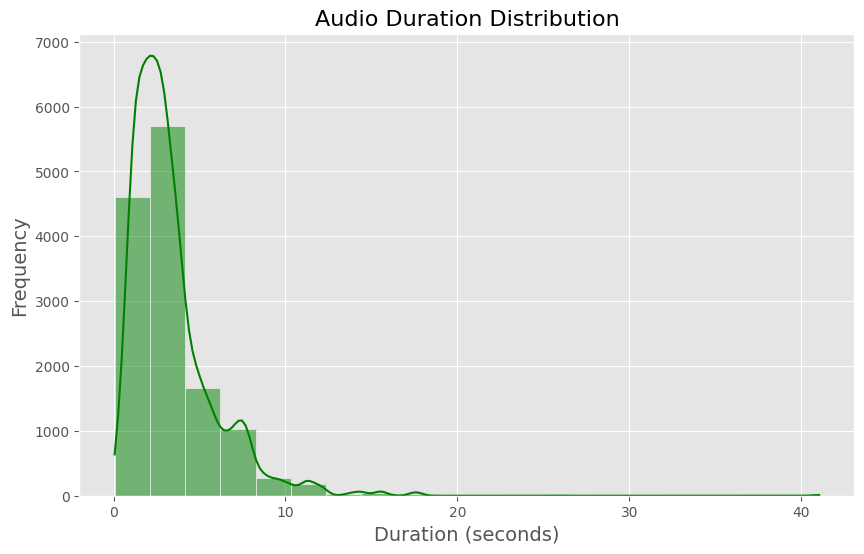

In [32]:
import librosa
import numpy as np

# Define audio file directory
audio_dir = r'datasets\raw\MELD\train\train_splits'

# Function to calculate audio duration
def get_audio_duration(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        return librosa.get_duration(y=y, sr=sr)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.nan

# Extract audio durations
meld_data['audio_file'] = meld_data['Dialogue_ID'].apply(lambda x: f'dia{x}_utt0.mp4')
meld_data['audio_duration'] = meld_data['audio_file'].apply(lambda x: get_audio_duration(os.path.join(audio_dir, x)))

# Plot audio duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(meld_data['audio_duration'].dropna(), bins=20, kde=True, color="green")
plt.title("Audio Duration Distribution", fontsize=16)
plt.xlabel("Duration (seconds)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [34]:
# Summarize insights
emotion_summary = meld_data.groupby('Emotion')[['word_count', 'audio_duration']].mean()
print("\nAverage Word Count and Audio Duration by Emotion:")
print(emotion_summary)

# Save results
emotion_summary.to_csv("datasets/metadata/emotion_summary.csv")


Average Word Count and Audio Duration by Emotion:
          word_count  audio_duration
Emotion                             
anger       9.247666        3.246339
disgust    10.016620        3.342242
fear        9.307263        3.545866
joy         7.716638        3.385302
neutral     7.823337        3.377994
sadness     9.951098        3.457485
surprise    5.985330        3.335937


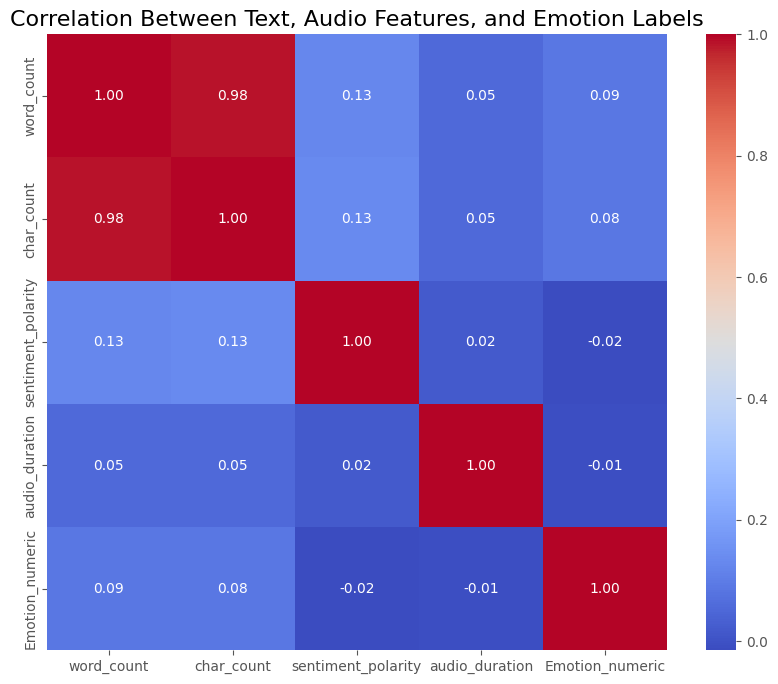

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert emotion labels to numeric for correlation
emotion_mapping = {emotion: idx for idx, emotion in enumerate(meld_data['Emotion'].unique())}
meld_data['Emotion_numeric'] = meld_data['Emotion'].map(emotion_mapping)

# Select numeric columns for correlation analysis
correlation_features = ['word_count', 'char_count', 'sentiment_polarity', 'audio_duration', 'Emotion_numeric']
correlation_matrix = meld_data[correlation_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Between Text, Audio Features, and Emotion Labels", fontsize=16)
plt.show()

C:\Users\rajt8\AppData\Local\Temp\ipykernel_26268\238734442.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="muted")


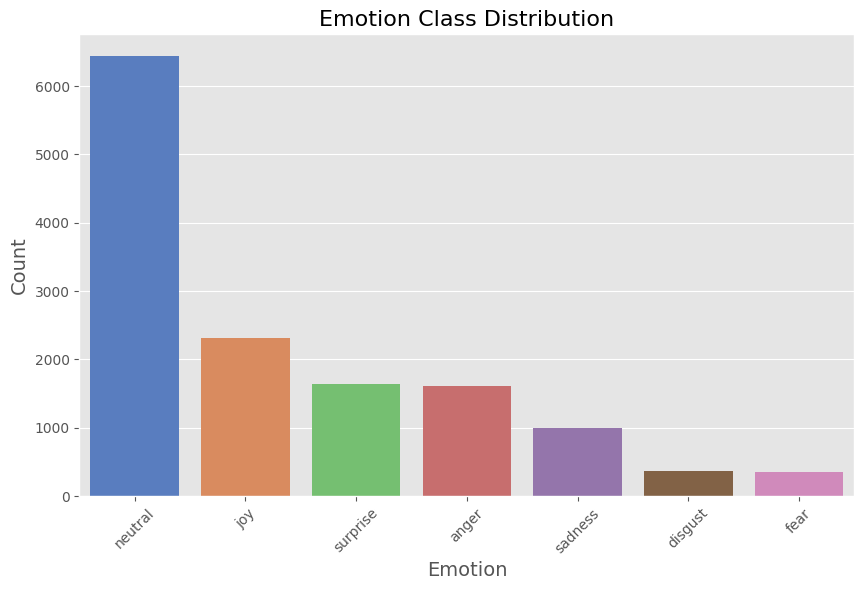


Emotion Class Percentages:
Emotion
neutral     46.950686
joy         16.836884
surprise    11.934637
anger       11.723081
sadness      7.309600
disgust      2.633499
fear         2.611614
Name: count, dtype: float64


In [36]:
# Emotion distribution
emotion_counts = meld_data['Emotion'].value_counts()

# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="muted")
plt.title("Emotion Class Distribution", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Print the percentage of each class
print("\nEmotion Class Percentages:")
print(emotion_counts / len(meld_data) * 100)

In [7]:
# Enhanced Synonym Replacement Function
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize

# Map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def enhanced_synonym_replacement(sentence, n=2):
    words = word_tokenize(sentence)
    pos_tags = pos_tag(words)
    replaced = 0

    for i, (word, tag) in enumerate(pos_tags):
        wordnet_pos = get_wordnet_pos(tag)
        if wordnet_pos:  
            synonyms = wordnet.synsets(word, pos=wordnet_pos)
            if synonyms:
                # Choose the most appropriate synonym
                synonym = synonyms[0].lemmas()[0].name()
                if synonym != word:  
                    words[i] = synonym
                    replaced += 1
        if replaced >= n:
            break
    return ' '.join(words)

# Example application
example_sentence = "She was thrilled to present her findings to the board during the annual review."
augmented_sentence = enhanced_synonym_replacement(example_sentence, n=3)
print(f"Original Sentence: {example_sentence}")
print(f"Augmented Sentence: {augmented_sentence}")

Original Sentence: She was thrilled to present her findings to the board during the annual review.
Augmented Sentence: She be thrill to show her findings to the board during the annual review .
